In [1]:
from platform import python_version
print(python_version())

3.8.13


In [14]:
import os
import pandas as pd
import numpy as np
import lmfit
import glob

from ipywidgets import interactive
from IPython.core.display import HTML
from IPython.core.display import display

import ipywidgets as widgets

import pprint

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

/var/folders/t8/307ghqxx5djb28nl56mkmx7j90c0xy/T/ipykernel_79311/3697657416.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


# load stack of images 

In [15]:
input_folder = "../data/tiff/"
list_images = glob.glob(input_folder + "/*.tiff")
assert len(list_images) > 0

In [16]:
images = {}
for _file in list_images:
    _data = np.asarray(Image.open(_file))
    short_file_name = os.path.basename(_file)
    images[short_file_name] = _data

# Interactivity plot images 

<IPython.core.display.Javascript object>


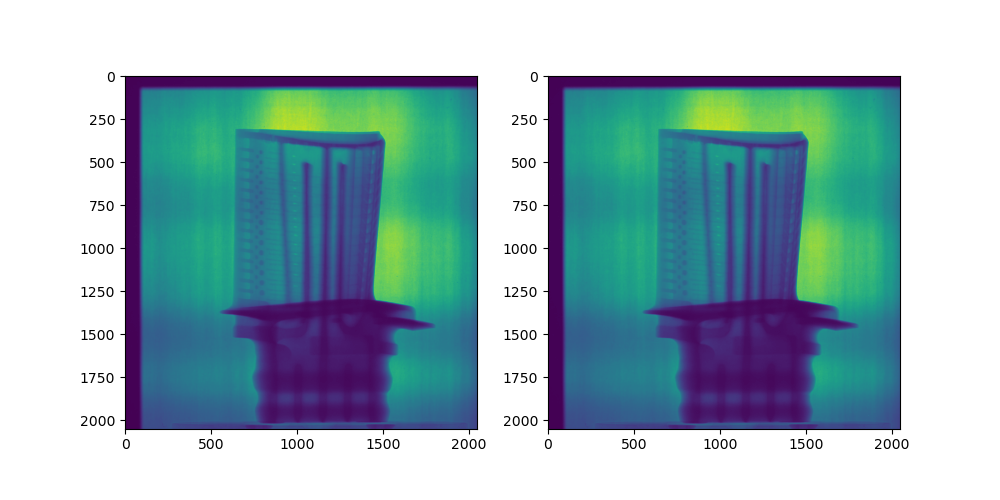

interactive(children=(Dropdown(description='filename_left', options=('SmallTurbine_0004.tiff', 'SmallTurbine_0…

In [19]:
fig, axes = plt.subplots(num="dfdf", figsize=(10, 5), nrows=1, ncols=2)

def plot_images(filename_left, filename_right):

    image_left = images[filename_left]
    image_right = images[filename_right]
                               
    profile_left = image_left.mean(axis=0)
    profile_right = image_right.mean(axis=0)
        
    axes[0].clear()
    axes[0].imshow(image_left)
#     axes[0].plot(profile_left)

    axes[1].clear()
    axes[1].imshow(image_right)
#     axes[1].plot(profile_right)
                                                               
                                                               
v = interactive(plot_images,
               filename_left = widgets.Dropdown(options=images.keys()),
               filename_right = widgets.Dropdown(options=images.keys()))
display(v)

